### Generating the distance from the complex origin.

In [17]:
import math
def generate_r(p,c,i):
    '''
      outputs a radius, r, from the origin of the complex plane.
      p: starting point as a complex number
      c: constant complex number
      i: number of iterations
    '''
    z = p
    iterations = 0
    r = 0
    while iterations < i:
        z = z**2 + c
        r = math.sqrt(z.real**2 + z.imag**2)
        iterations += 1
    return round(r,2)

In [19]:
c = -0.7 + 0.27j
p = 0.5 + 1j
i = 2

generate_r(p,c,i)

3.42

### Function from blog post part 1

In [53]:
import matplotlib.pyplot as plt
import numpy as np

def julia_set(w, h, c = -0.7+ 0.27j, zoom=1, niter=256):
    """ A julia set of geometry (width x height) and iterations 'niter' """

    # Why (hxw) ? Because numpy creates a matrix as row x column
    # and height represents the y co-ordinate or rows and
    # width represents the x co-ordinate or columns.
    pixels = np.arange(w*h,dtype=np.uint16).reshape(h, w)
    
    for x in range(w): 
        for y in range(h):
            # calculate the initial real and imaginary part of z,
            # based on the pixel location and zoom and position values
            zx = 1.5*(x - w/2)/(0.5*zoom*w) 
            zy = 1.0*(y - h/2)/(0.5*zoom*h)

            for i in range(niter):
                radius_sqr = zx*zx + zy*zy
                # Iterate till the point is outside
                # the circle with radius 2.
                if radius_sqr > 4: break
                # Calculate new positions
                zy,zx = 2.0*zx*zy + c.imag, zx*zx - zy*zy + c.real

            color = (i >> 21) + (i >> 10)  + i*8
            pixels[y,x] = color
  
    # display the created fractal 
    plt.imshow(pixels)
    plt.show()

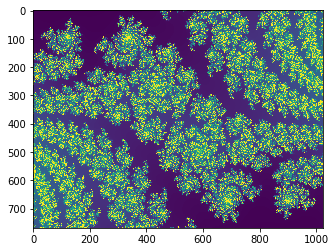

In [66]:
julia_set(1024,768,zoom=4,niter = 256)

In [61]:
arr = np.arange(1024*768,dtype=np.uint16)
print(arr)
print(len(arr))
arr2 = np.arange(1024*768,dtype=np.uint16).reshape(768,1024)
print(arr2)
print(len(arr2))

[    0     1     2 ... 65533 65534 65535]
786432
[[    0     1     2 ...  1021  1022  1023]
 [ 1024  1025  1026 ...  2045  2046  2047]
 [ 2048  2049  2050 ...  3069  3070  3071]
 ...
 [62464 62465 62466 ... 63485 63486 63487]
 [63488 63489 63490 ... 64509 64510 64511]
 [64512 64513 64514 ... 65533 65534 65535]]
768


In [62]:
arr = np.arange(1024*768)
print(arr)
print(len(arr))
arr2 = np.arange(1024*768).reshape(768,1024)
print(arr2)
print(len(arr2))

[     0      1      2 ... 786429 786430 786431]
786432
[[     0      1      2 ...   1021   1022   1023]
 [  1024   1025   1026 ...   2045   2046   2047]
 [  2048   2049   2050 ...   3069   3070   3071]
 ...
 [783360 783361 783362 ... 784381 784382 784383]
 [784384 784385 784386 ... 785405 785406 785407]
 [785408 785409 785410 ... 786429 786430 786431]]
768
